## Loading Packages & Data Set

In [3]:
#Import the required EDA, visualisation, and modeling packages
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm  # Import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
df = pd.read_csv('Canada.csv', encoding="ISO-8859-1")

In [7]:
df

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0
...,...,...,...,...,...,...,...,...,...,...
35763,Halifax,439900.0,301 60 Walter Havill Drive,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35764,Halifax,6990000.0,1160 Rockcliffe Street,5,5,Nova Scotia,431479,44.8857,63.1005,86753.0
35765,Halifax,419900.0,212 60 Walter Havill Drive,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35766,Halifax,949900.0,10 Idlewylde Road,3,1,Nova Scotia,431479,44.8857,63.1005,86753.0


In [9]:
df['Province'].value_counts()

Province
Ontario                      14015
British Columbia             11244
Alberta                       3880
Saskatchewan                  3707
New Brunswick                  874
Quebec                         770
Newfoundland and Labrador      657
Manitoba                       530
Nova Scotia                     91
Name: count, dtype: int64

In [11]:
df['Number_Baths'].value_counts()

Number_Baths
2     12217
3      9086
1      6733
4      5062
5      1127
0       658
6       486
7       176
8       106
9        69
10       16
12       11
11        9
16        3
22        2
25        1
17        1
59        1
15        1
21        1
14        1
20        1
Name: count, dtype: int64

In [13]:
df['Number_Beds'].value_counts()

Number_Beds
3      10174
4       7831
2       7724
5       4004
1       2729
6       1581
0        769
7        511
8        253
9         96
10        35
11        17
12        13
15         6
16         5
20         3
17         2
18         2
21         1
13         1
26         1
27         1
47         1
40         1
35         1
109        1
46         1
14         1
36         1
30         1
19         1
Name: count, dtype: int64

In [15]:
#We already have Latitude/Longitude so Address isn't a relevant varialbe. Dropping it.
df = df.drop(["Address"], axis=1)

## Data Cleaning

In [18]:
#109 bedrooms is a clear outlier and implausable, so this data point was removed. But a cursary search of real estate in Canada didn't yield any listings
#with more than 20 bedrooms, so I also deleted all entries with more than 20 bedrooms. 
more_than_20_beds = df[df['Number_Beds'] > 20].index
df.drop(more_than_20_beds,inplace = True)

In [20]:
#I also didn't find any actively listed Canadian homes with more than 12 bathrooms, so dropped this as well.
more_than_12_baths = df[df['Number_Baths'] > 12].index
df.drop(more_than_12_baths,inplace = True)

In [22]:
#Number of Bathrooms was loaded as a float, so converted to numeric.
df['Number_Baths'] = pd.to_numeric(df['Number_Baths'], errors='coerce').astype('int64')

In [24]:
df

,City,Price,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,1,1,Ontario,5647656,43.7417,-79.3733,97000.0
...,...,...,...,...,...,...,...,...,...
35763,Halifax,439900.0,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35764,Halifax,6990000.0,5,5,Nova Scotia,431479,44.8857,63.1005,86753.0
35765,Halifax,419900.0,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35766,Halifax,949900.0,3,1,Nova Scotia,431479,44.8857,63.1005,86753.0


In [26]:
#The number of listings with more than 5 bathrooms greatly plummits, so consolidating these houses and will interpret as 6 or more bathrooms
df.loc[df['Number_Baths'] > 5, 'Number_Baths'] = 6

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35755 entries, 0 to 35767
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  35755 non-null  object 
 1   Price                 35755 non-null  float64
 2   Number_Beds           35755 non-null  int64  
 3   Number_Baths          35755 non-null  int64  
 4   Province              35755 non-null  object 
 5   Population            35755 non-null  int64  
 6   Latitude              35755 non-null  float64
 7   Longitude             35755 non-null  float64
 8   Median_Family_Income  35755 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 2.7+ MB


In [30]:
##The number of listings with more than 6 bedrooms also greatly plummits, so consolidating these houses as 7 or more bedrooms
df.loc[df['Number_Beds'] > 6, 'Number_Beds'] = 7

In [32]:
#Deleting all entries of houses listed with no bathrooms (this is nonsensical).
df = df.loc[~((df['Number_Baths'] == 0))]

In [34]:
#Studio listings (0 bedrooms) are plausible, but I was unable to find a real life studio listing above $750K CAD. So I removed all 0 bedroom listings that were priced above $800K CAD.
df = df.loc[~((df['Number_Beds'] == 0) & (df['Price'] > 800000))]

In [36]:
#During preminary EDA in Tableau I noticed multiple cities with the same name across different Canadian provinces. The Longitude/Latitude data
#were identical for these listings regardless of Province name, so I reassigned province name for all these entries to match the geocoordinates. 
df.loc[df['City'] == 'Nanaimo', 'Province'] = 'British Columbia'
df.loc[df['City'] == 'Saskatoon', 'Province'] = 'Saskatchewan'
df.loc[df['City'] == 'Regina', 'Province'] = 'Saskatchewan'
df.loc[df['City'] == 'Winnipeg', 'Province'] = 'Manitoba'

In [38]:
df.to_excel('Cleaned Data/Canada_Cleaned2.xlsx', index=False, engine='openpyxl')

## EDA

count    3.507700e+04
mean     9.457723e+05
std      1.012085e+06
min      2.150000e+04
25%      4.693607e+05
50%      6.999000e+05
75%      1.098000e+06
max      3.700000e+07
Name: Price, dtype: float64


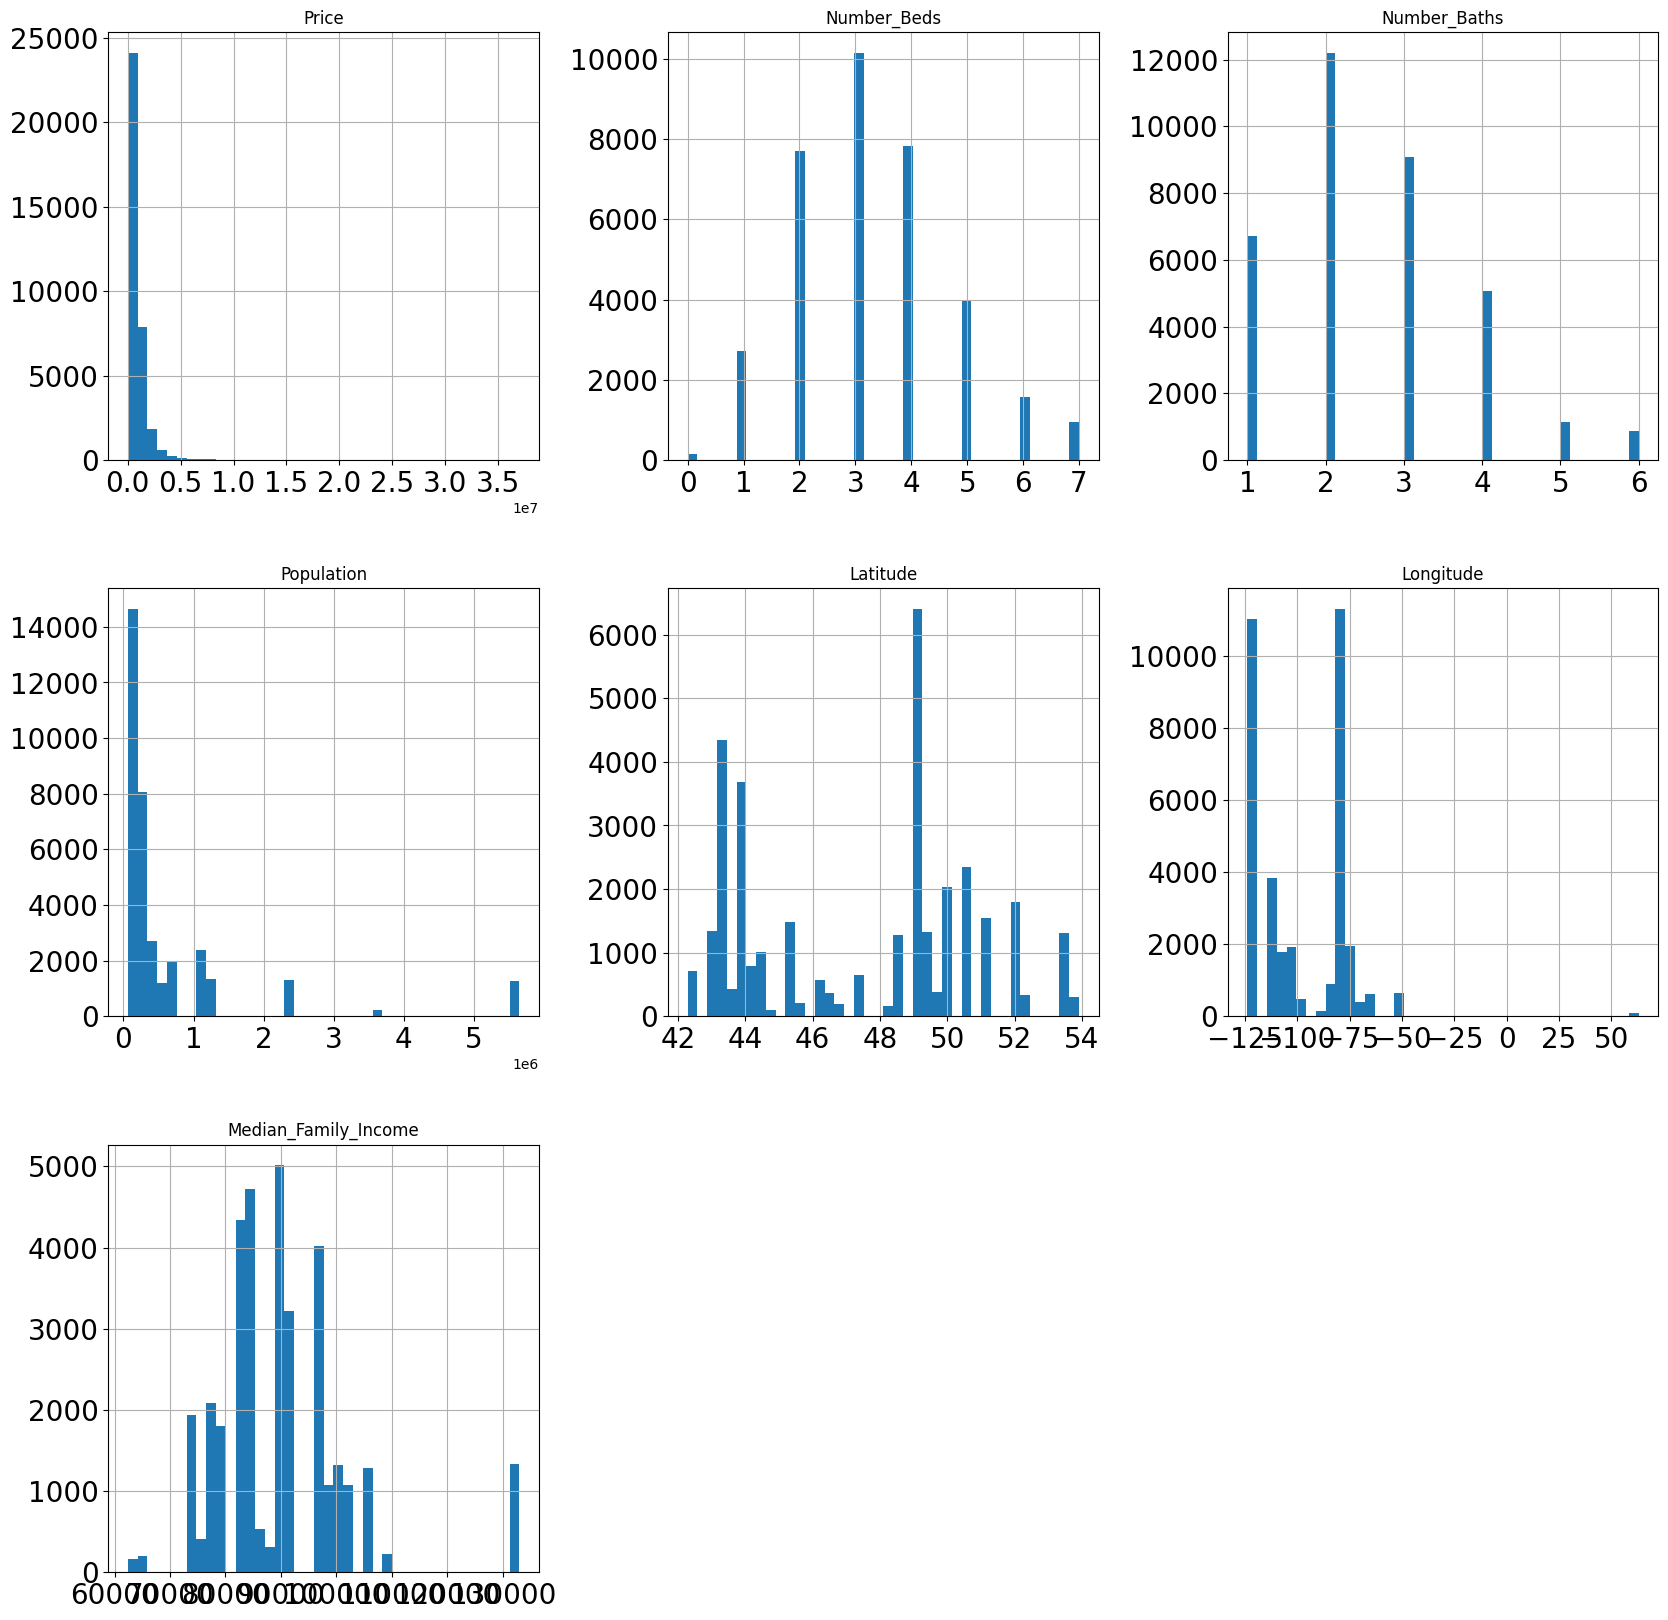

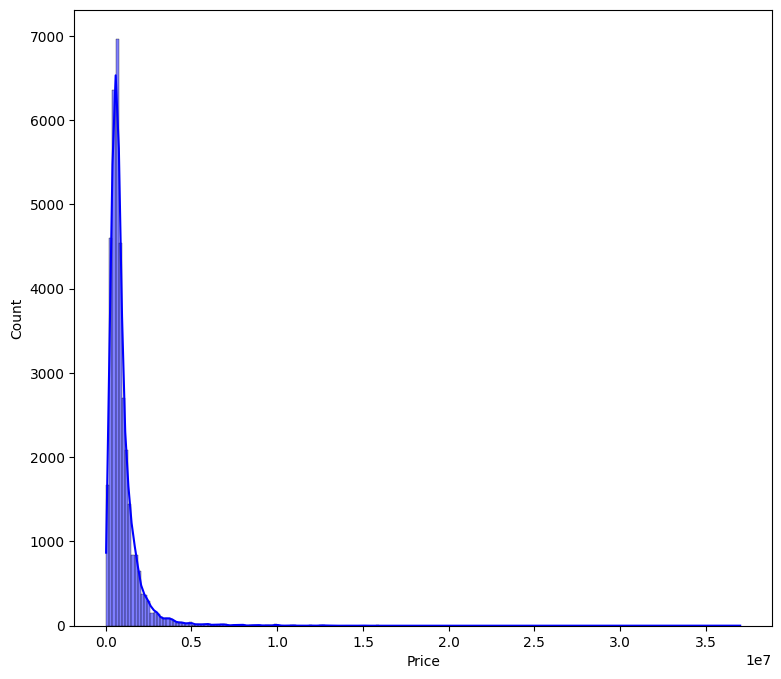

In [40]:
df.hist(figsize=(20, 20), bins=40, xlabelsize=20, ylabelsize=20);

print(df['Price'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(df['Price'], color='b', bins=200, kde=True);

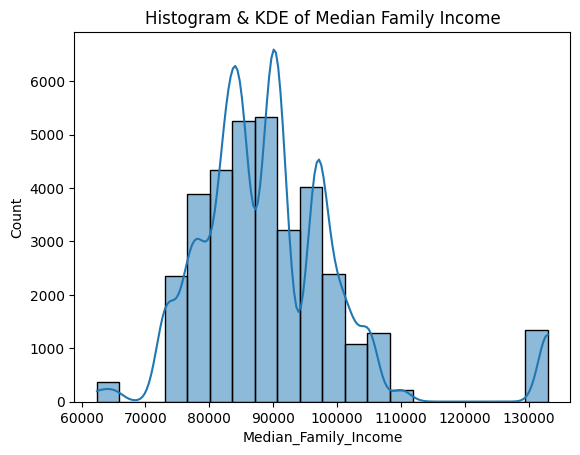

In [42]:
sns.histplot(df['Median_Family_Income'],kde = True, bins = 20)
plt.title('Histogram & KDE of Median Family Income')
plt.show()

The number of bedrooms & bathrooms are somewhat normally distributed, but price, population, and median family income skew to the right. Price is due to extremely high priced houses in Vancouver, British Columbia and greater Toronto & Barrie, Ontario. Population is skewed by the high populations of Canada's three big cities (Toronto, Vancouver, Montreal). Skewed family income is due to the disproportinately high median salary of Caledon, Ontario.

#### Boxplots and Distribution Patterns

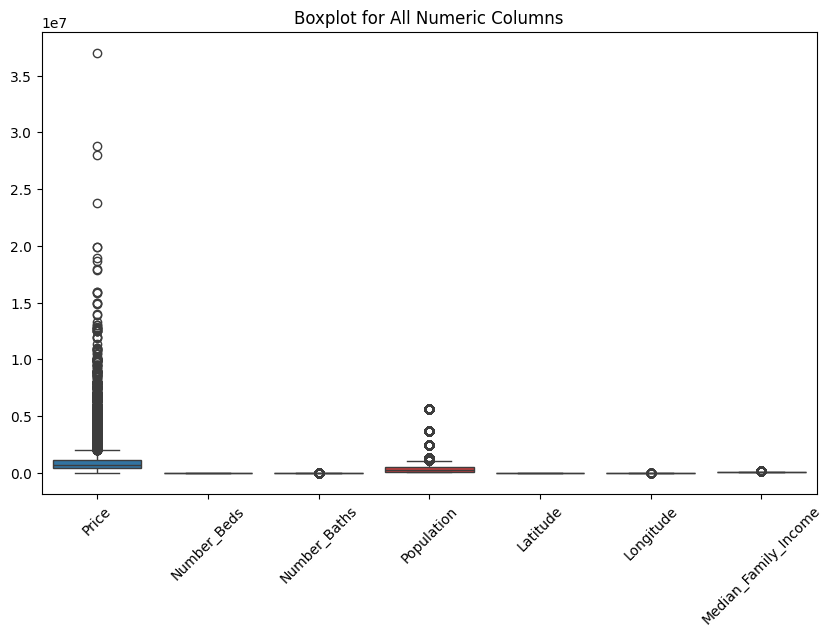

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, orient="v")  # `orient="v"` makes it vertical (default)
plt.title("Boxplot for All Numeric Columns")
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()

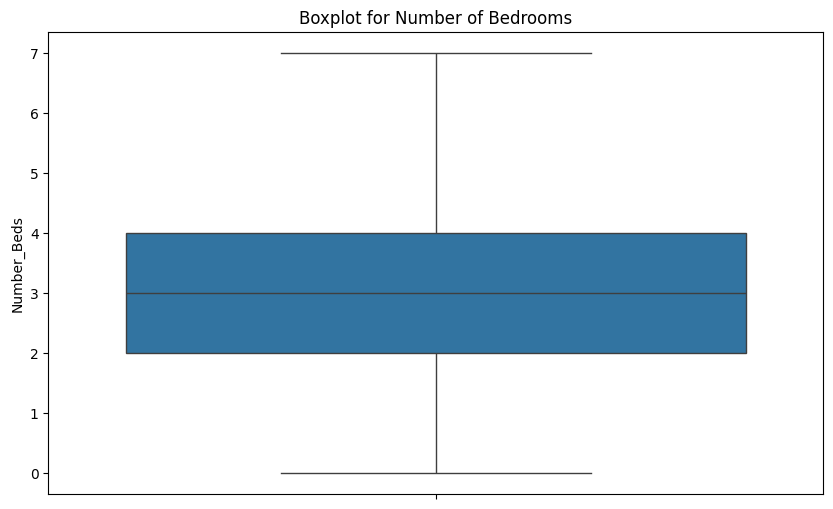

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['Number_Beds'], orient="v")
plt.title("Boxplot for Number of Bedrooms")
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()

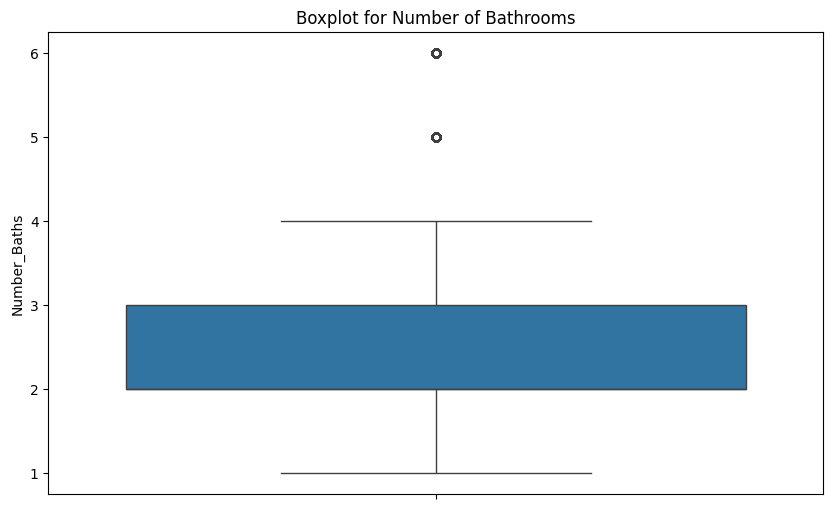

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['Number_Baths'], orient="v")
plt.title("Boxplot for Number of Bathrooms")
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()

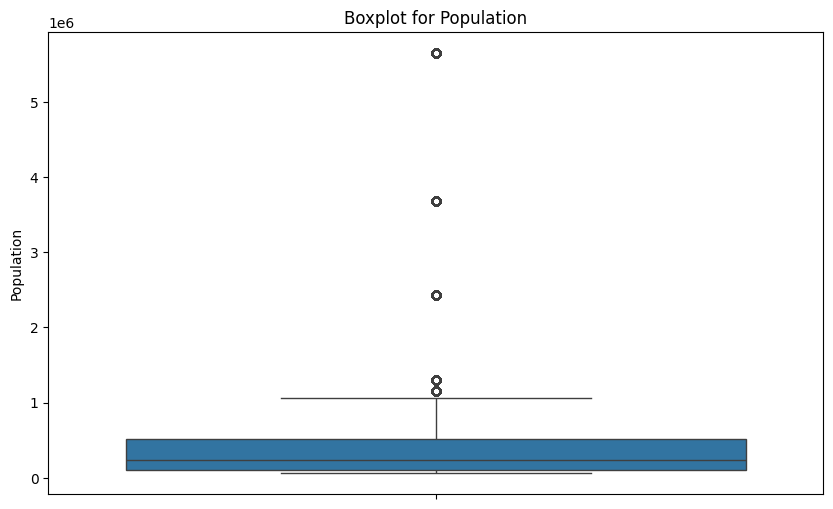

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['Population'], orient="v")
plt.title("Boxplot for Population")
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()

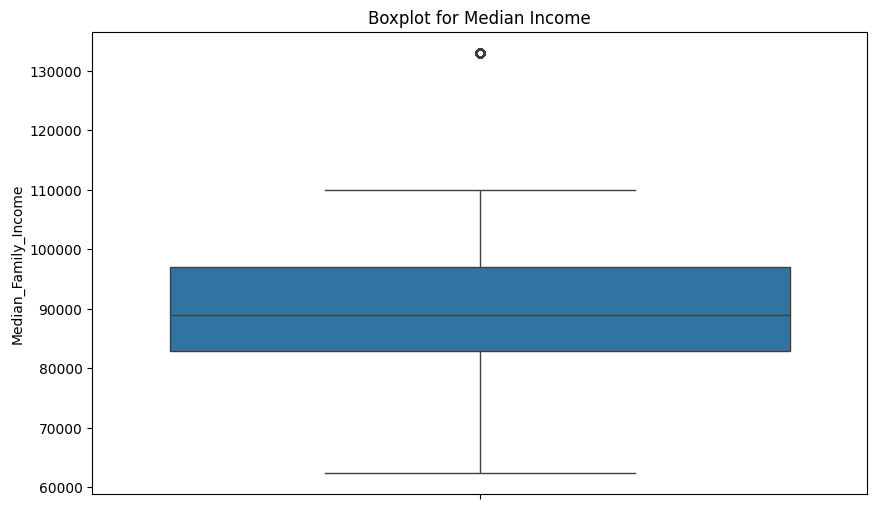

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['Median_Family_Income'], orient="v")
plt.title("Boxplot for Median Income")
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()

### Exploring relationship between province, family income, and house price

In [54]:
grouped_df = df.groupby('Province',as_index=False)['Price'].mean()

In [56]:
grouped_df

,Province,Price
0,Alberta,5.335004e+05
1,British Columbia,1.368656e+06
2,Manitoba,4.821275e+05
3,New Brunswick,4.159635e+05
4,Newfoundland and Labrador,4.387233e+05
5,Nova Scotia,7.947711e+05
6,Ontario,9.517594e+05
7,Quebec,6.046060e+05
8,Saskatchewan,4.021541e+05


In [58]:
avgincome_df = df.groupby('Province', as_index=False)['Median_Family_Income'].mean()

/var/folders/8w/5949xr0n5_dby4vc47tq98lc0000gn/T/ipykernel_1649/2785575448.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")


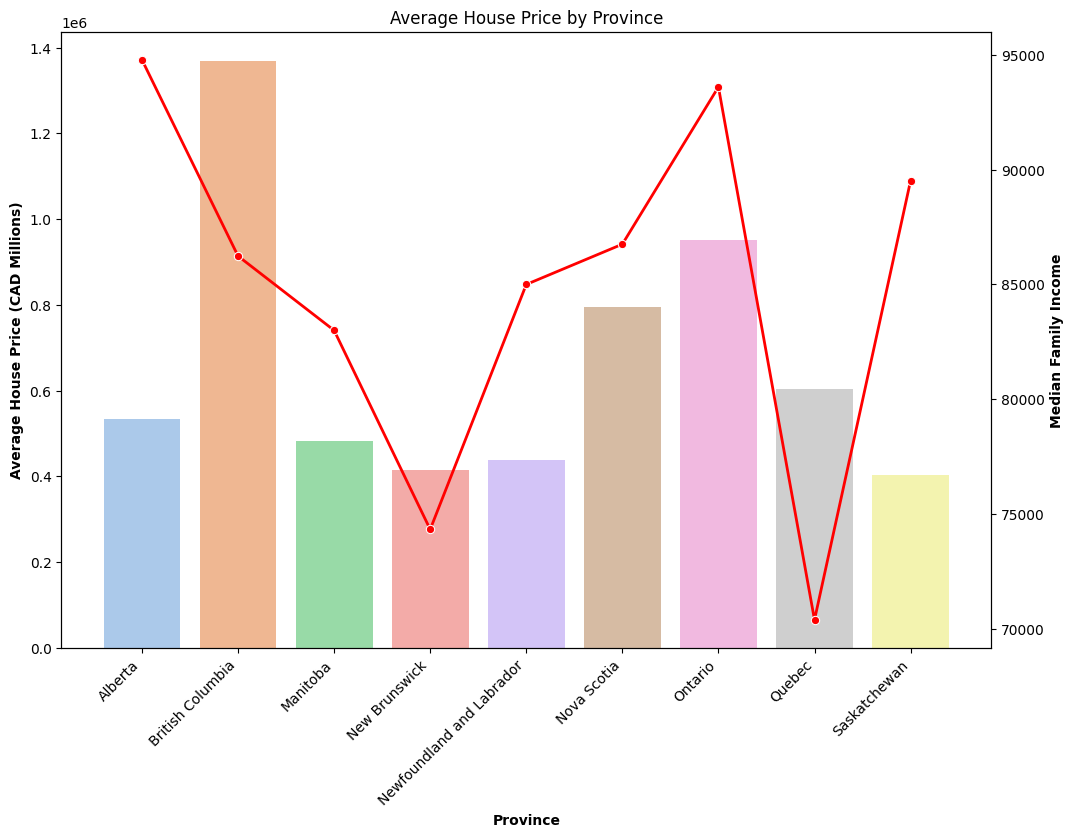

In [60]:
fig, ax1 = plt.subplots(figsize=(12, 8))
sns.barplot(x='Province', y='Price', hue='Province', data=grouped_df, palette='pastel', legend = False, ax=ax1)

# Create second y-axis for the median family income line to see if there is a correlation between increasing income and increasing house price by province
ax2 = ax1.twinx()

# Line plot (Income)
sns.lineplot(x='Province', y='Median_Family_Income', data=avgincome_df, color='red', marker='o', linewidth=2, ax=ax2)

ax1.set_xlabel("Province", fontweight = 'bold')
ax1.set_ylabel("Average House Price (CAD Millions)",fontweight = 'bold')
ax2.set_ylabel("Median Family Income",fontweight = 'bold')
plt.title("Average House Price by Province")

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")

plt.show()

#### Findings

British Columbia is the province with by far the highest average house price. Ontario has the next highest mean house price.

Provinces with higher average house prices do not have the highest median family incomes. British Columbia only has the 5th highest median income. Alberta and Saskatchewan have some of the highest median family incomes but also some of the lowest average house prices.


In [63]:
avgincome_df

,Province,Median_Family_Income
0,Alberta,94780.729167
1,British Columbia,86236.608357
2,Manitoba,83000.000000
3,New Brunswick,74333.876221
4,Newfoundland and Labrador,85000.000000
5,Nova Scotia,86753.000000
6,Ontario,93598.503382
7,Quebec,70398.701299
8,Saskatchewan,89516.346933


### Exploring cities with the highest house prices

In [65]:
df.groupby('City')['Price'].mean().sort_values(ascending=True)

City
Regina              3.383674e+05
Saint John          3.635431e+05
Sault Ste. Marie    4.260207e+05
Edmonton            4.270015e+05
Quebec              4.379159e+05
St. John's          4.387233e+05
Moncton             4.420458e+05
Lethbridge          4.436270e+05
Medicine Hat        4.481375e+05
Thunder Bay         4.597032e+05
Saskatoon           4.702526e+05
Winnipeg            4.821275e+05
Red Deer            4.859322e+05
Trois-Rivieres      4.914593e+05
Sherbrooke          5.135488e+05
Prince George       5.289222e+05
Sudbury             6.029426e+05
Windsor             6.435290e+05
Calgary             6.600464e+05
Airdrie             7.359054e+05
Kamloops            7.485361e+05
Kingston            7.615960e+05
Halifax             7.947711e+05
London              7.956593e+05
Ottawa              7.964754e+05
Peterborough        7.988272e+05
St. Catharines      8.718783e+05
Nanaimo             8.833920e+05
Kitchener           8.892534e+05
Montreal            9.313923e+05
Brant

In [67]:
df_cities = df.groupby('City',as_index=False)['Price'].mean()

In [69]:
top15_cities = df_cities.sort_values(by='Price', ascending=False).head(15)

In [71]:
top15_cities

,City,Price
42,White Rock,2.218539e+06
40,Vancouver,1.845241e+06
17,Maple Ridge,1.495741e+06
5,Caledon,1.384758e+06
0,Abbotsford,1.338387e+06
4,Burnaby,1.322795e+06
38,Toronto,1.233561e+06
41,Victoria,1.198163e+06
22,New Westminster,1.182303e+06
8,Guelph,1.053870e+06


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'White Rock'),
  Text(1, 0, 'Vancouver'),
  Text(2, 0, 'Maple Ridge'),
  Text(3, 0, 'Caledon'),
  Text(4, 0, 'Abbotsford'),
  Text(5, 0, 'Burnaby'),
  Text(6, 0, 'Toronto'),
  Text(7, 0, 'Victoria'),
  Text(8, 0, 'New Westminster'),
  Text(9, 0, 'Guelph'),
  Text(10, 0, 'Barrie'),
  Text(11, 0, 'Kelowna'),
  Text(12, 0, 'Oshawa'),
  Text(13, 0, 'Hamilton'),
  Text(14, 0, 'Brantford')])

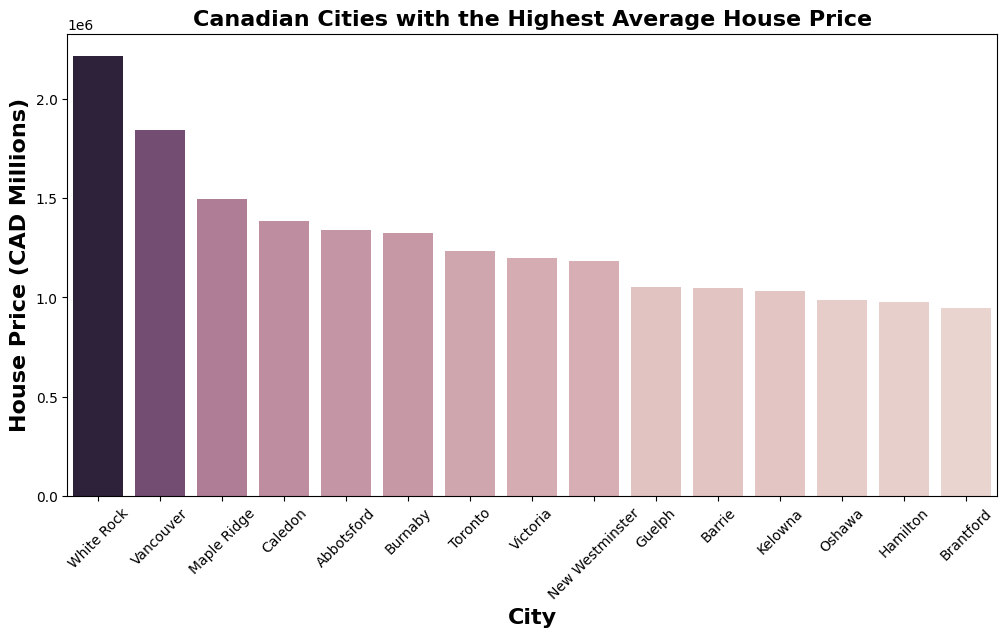

In [73]:
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Price', data=top15_cities, hue='Price', legend = False)
plt.ylabel('House Price (CAD Millions)',fontweight = 'bold', fontsize = 16)
plt.xlabel('City', fontweight = 'bold', fontsize = 16)
plt.title('Canadian Cities with the Highest Average House Price', fontweight = 'bold', fontsize = 16)
plt.xticks(rotation=45) 

#### Findings

White Rock, Vancouver, and Maple Ridge are the cities with the highest average house prices, all above $1.4 million CAD. All three cities are in British Columbia. 8 of the 15 cities in Canada with the most expensive listed homes are in British Columbia.

In [77]:
df_cities2 = df.groupby(['City'], as_index=False).agg({
    'Median_Family_Income': 'mean',
    'Price': 'mean',
})

In [83]:
top15_cities2 = df_cities2.sort_values(by='Price', ascending=False).head(15)

/var/folders/8w/5949xr0n5_dby4vc47tq98lc0000gn/T/ipykernel_1649/3613400350.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")


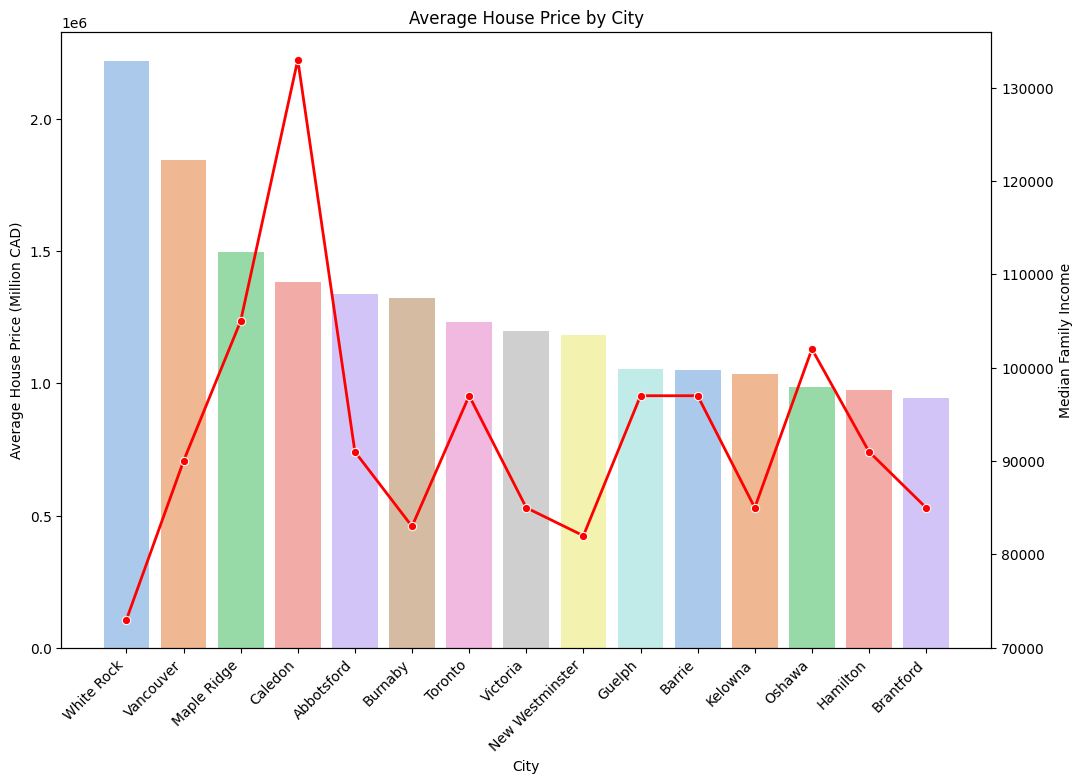

In [85]:
fig, ax1 = plt.subplots(figsize=(12, 8))
sns.barplot(x='City', y='Price', hue='City', data=top15_cities2, palette='pastel', legend = False, ax=ax1)

# Create second y-axis for the line plot
ax2 = ax1.twinx()

# Line plot (Income)
sns.lineplot(x='City', y='Median_Family_Income', data=top15_cities2, color='red', marker='o', linewidth=2, ax=ax2)

ax1.set_xlabel("City")
ax1.set_ylabel("Average House Price (Million CAD)")
ax2.set_ylabel("Median Family Income")
plt.title("Average House Price by City")

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")

plt.show()

As with province, there is not a noticeable correslation between higher median income and higher house value (by city).

### Checking Correlation between Variables

In [150]:
df_numeric = df.select_dtypes(include=['number'])

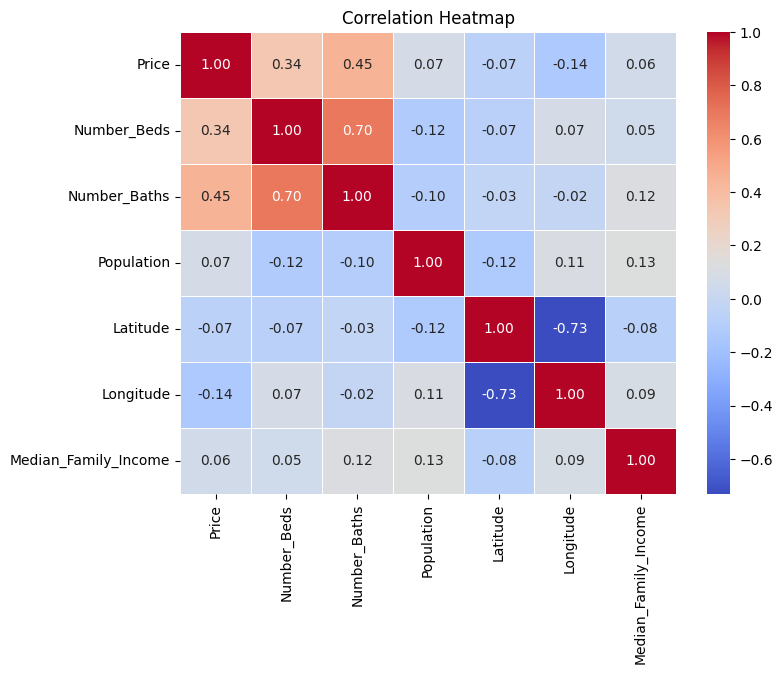

In [152]:
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [154]:
#But also want to see correlation for categorical variables, So I encoded dummy variables.
df_encoded = pd.get_dummies(df, columns=['Province', 'City'], drop_first=True)

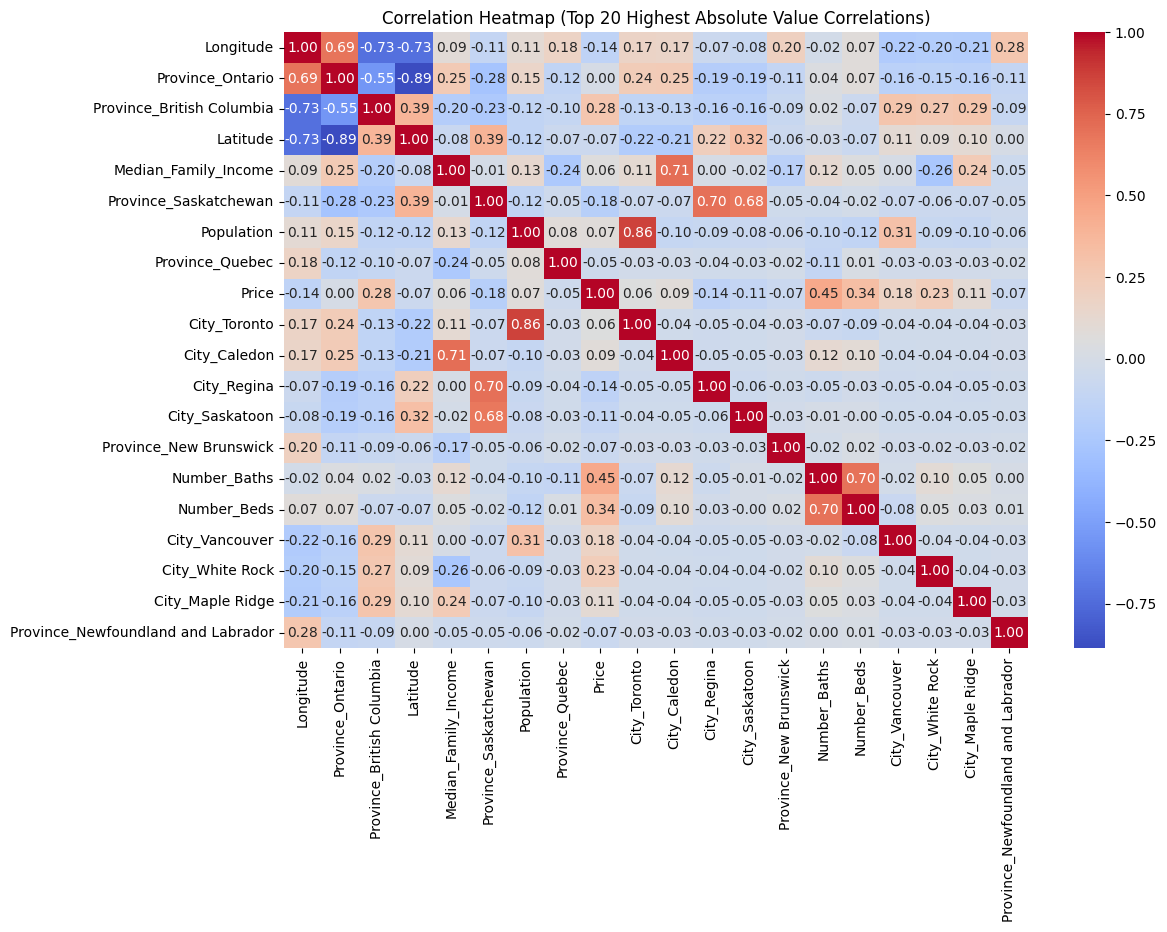

In [156]:
#After converting province and city to numerical, correlation is reinterpreted to include the newly encoded variables and top 20 most correlated features are selected.
corr = df_encoded.corr()
top_features = corr.abs().mean().nlargest(20).index  # Filter heatmap to 20 features with the highest absulute value correlations
plt.figure(figsize=(12, 8))

sns.heatmap(corr.loc[top_features, top_features], annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Top 20 Highest Absolute Value Correlations)")
plt.show()

### Correlation Map Findings

Number of bedrooms, number of bathrooms, Province (British Columbia), and City (Vancouver, White Rock) have the highest correlation values against House Price. They are the only variables with values higher than 0.2.

Multicollinearity is a concern here though. The correlation between number of bedrooms and number of bathrooms is the highest in the dataset (0.70). Given the intuitive relationship between increasing number of bedrooms and increasing number of bathrooms, we should measure the variance inflation factor (VIF). VIF measures how much variance (instability) in a regression coefficient is increased due to collinearity between the independent variables. It accounts for all relationships among independent variables, not just the pairwise bedroom/bathroom comparison of the heat map.

A high VIF (>5) suggests strong collinearity, making it harder to isolate the effect of a variable.

In [174]:
# Define the dataset with only the two suspected collinear variables
X = df_encoded[['Number_Beds', 'Number_Baths', 'Median_Family_Income', 'Population']]

# Add a constant column (required for VIF calculation)
X = sm.add_constant(X)

# Compute VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

               Variable        VIF
0                 const  59.814787
1           Number_Beds   1.956734
2          Number_Baths   1.973041
3  Median_Family_Income   1.036513
4            Population   1.035355


Number of Bedroom and Number of Bathroom VIFs are each well below 5, which indicates little to no collinearity, at least as far as this dataset is concerned. Using this standard, both variables can stay in the model.

On a related note, we will drop Province from the model since this information can already be inferred from the City variable.

#### Splitting & Training the Regression Model

Based on the analysis above, I selected number of beds, number of bathrooms, province, and city as explanatory variables for the regression model as these had the highest correlation scores in the heat maps.

The overall low correlation between the explanatory variables and price suggests that any regression model will not explain much of the variation in the target variable. But let's take a quick look anyways.

In [225]:
#Define Features and Target Variable
X = df[['Number_Beds', 'Number_Baths', 'City']]
y = df['Price']

# One-hot encode 'Province'
X = pd.get_dummies(X, columns=['City'], drop_first=True)

# Split data sets between training and testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features to inmprove model stability and performance
scaler = StandardScaler()
X_train[['Number_Beds', 'Number_Baths']] = scaler.fit_transform(X_train[['Number_Beds', 'Number_Baths']])
X_test[['Number_Beds', 'Number_Baths']] = scaler.transform(X_test[['Number_Beds', 'Number_Baths']])


In [227]:
# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [229]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 376757.6966538997
Mean Squared Error (MSE): 668735503922.9912
R² Score: 0.37444571564251905


#As predicted, this regression model is not a very acurate predictor for house price. Only 37.4% of the variance in house prices is explained by this model's input. Other important variables that are frequently used to estimate house prices are not available in this data set (e.g., square footage, location specifics, amenities (e.g., back yard, garage), crime rate, local school district).

An alternative classification model such as Random Forest or XGBoose could also be explored to test a more accurate model.

#### Verifying whether the model fulfills linear regression assumptions

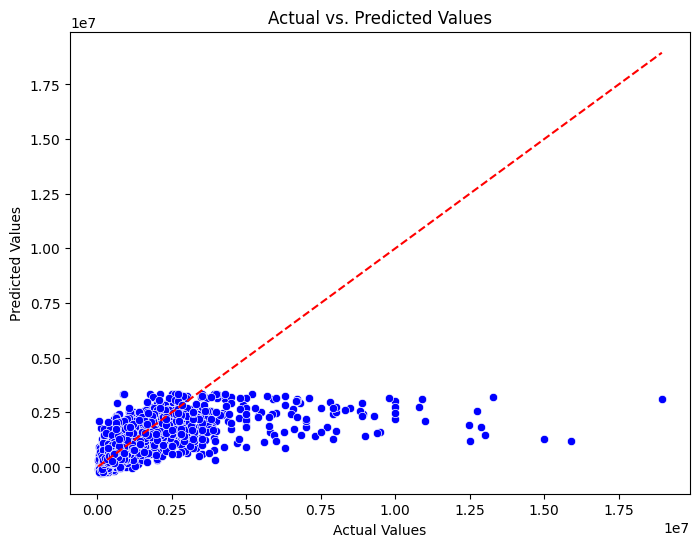

In [232]:
#Plot actual vs. predicted values to see if they follow a linear trend.

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Perfect Fit Line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

#residuals do not follow a clear linear trend, so this assumption is not upheld.

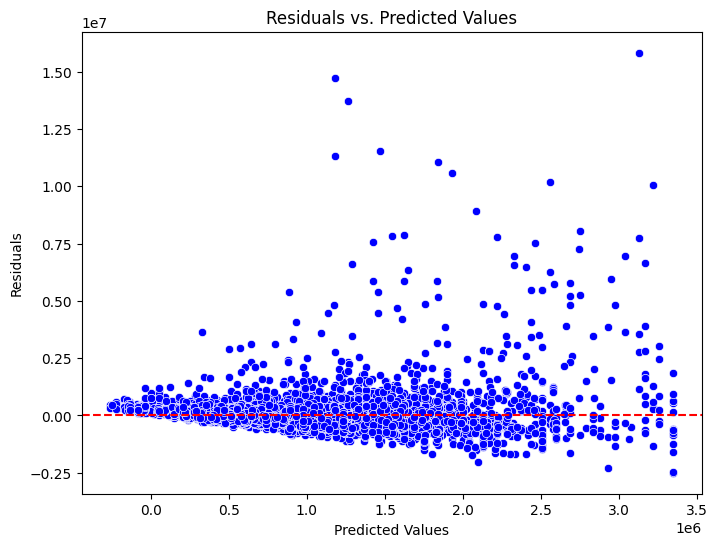

In [234]:
#Residuals vs. Predicted Values (Homoscedasticity)
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

#There is a fan shape towards the right side and the pattern isn't uniformly random throughout. This assumption might be violated.

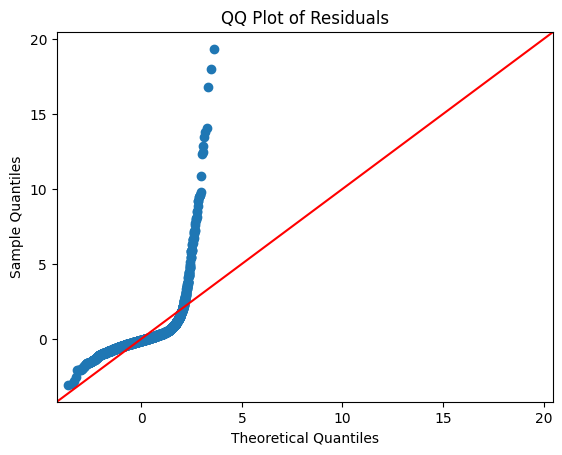

In [236]:
#QQ Plot to assess normality of residuals

sm.qqplot(residuals, line='45', fit=True)
plt.title("QQ Plot of Residuals")
plt.show()

#points deviate substantially from the red line, so normality is vioalted.

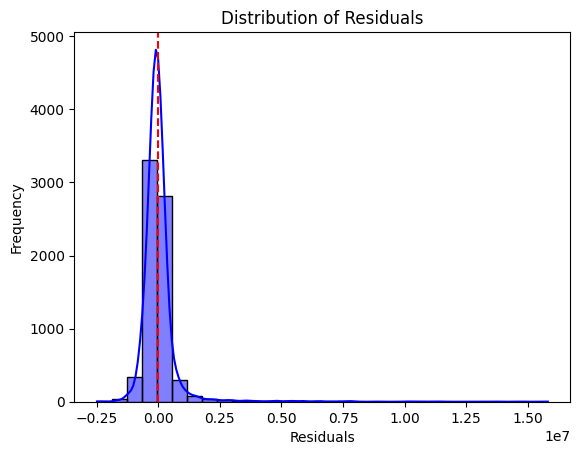

In [238]:
#Histogram of residuals

sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

#curve is largely bell shaped, so this assumption is upheld.

In short, linear regression does not seem like a good fit for this data set. We could try to transform the data so that it better fits a linear pattern. But given the low heat map correlation scores and lack of other housing-related factors represented in the data, the impact would probably be limited. Also, transformations would complicate interpretibility of the model, so let's see if a different classification model with inherently difficult interpretability relative to linear regression can predict house prices with better accurary.

### Random Forest

In [241]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [243]:
X = df[['Number_Beds', 'Number_Baths', 'City', 'Population', 'Median_Family_Income']]
y = df['Price']

In [251]:
# Identify categorical & numerical columns
categorical_features = ['City']
numerical_features = ['Number_Beds', 'Number_Baths']

# Preprocessing: One-Hot Encoding for categorical, Scaling for numerical
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [255]:
# Define the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create a pipeline to apply preprocessing and train model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

# Train the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Number_Beds',
                                                   'Number_Baths']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['City'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [259]:
y_pred = pipeline.predict(X_test)

In [261]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R² Score: {r2:.2f}')


Mean Absolute Error (MAE): 325591.67
Mean Squared Error (MSE): 603708628427.89
Root Mean Squared Error (RMSE): 776986.89
R² Score: 0.44


The random forest model is a bit more accurate in terms of predicting house, but the coefficient of determination is still quite low at 0.44.

XG boost model will likely yied similar accuracy.

The Overall limitations of this data set are that 1) Many of the explanatory variables that are used to gage house values are not included and 2) the house prices do not seem to respond in a sensible manner to some of the explanatory variables that are included. E.g., cities/provinces/states with higher average incomes generally have higher home prices, but that is not the case with this data set.

After spending a bit of time with exploratory data analysis and model selection, I found that the most remarkable story being told by this data set is the disproportionate cost of homes relative to average income. I further explored this through visualizations using Tableau.